# A/B Hypothesis Testing 

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np



In [14]:
#
import os
print(os.getcwd())


c:\Users\Hp\Videos\week3\notebooks


In [1]:
import sys
sys.path.append(r"C:\Users\Hp\Videos\week3")

from scripts.ab_hypothesis_testing import ABHypothesisTesting



In [11]:
import os
import sys

# Ensure the correct working directory
os.chdir(r"C:\Users\Hp\Videos\week3")
print("Working directory:", os.getcwd())

# Append the project path to system path
sys.path.append(r"C:\Users\Hp\Videos\week3")
print("System path:", sys.path)


Working directory: C:\Users\Hp\Videos\week3
System path: ['C:\\ProgramData\\miniconda3\\python312.zip', 'C:\\ProgramData\\miniconda3\\DLLs', 'C:\\ProgramData\\miniconda3\\Lib', 'C:\\ProgramData\\miniconda3', 'c:\\Users\\Hp\\Videos\\week3\\venv', '', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Hp\\Videos\\week3', 'C:\\Users\\Hp\\Videos\\week3']


In [2]:
from scripts.ab_hypothesis_testing import ABHypothesisTesting

In [6]:
import pandas as pd
df = pd.read_csv('../data/insurance_data.csv')



In [7]:
# Initialize the hypothesis testing class
hypothesis_testing = ABHypothesisTesting(df)


In [6]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())


Unnamed: 0     0
Province       0
Zipcode        0
Gender         0
Total_Claim    0
Premium        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())


  Province  Zipcode  Gender  Total_Claim      Premium
0        C     1003  Female   652.740226   898.493109
1        A     1003  Female  1159.389368  1040.563548
2        C     1003    Male   729.641413  1137.593249
3        C     1003  Female   253.524198   764.332164
4        A     1001    Male   938.056933  1349.828367


## Risk Differences Across Provinces

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) across provinces. The goal is to understand how risk varies regionally, which can inform province-specific policies or risk management strategies.

### Hypotheses
- **Null Hypothesis (H₀):** No risk differences across provinces.
- **Alternative Hypothesis (H₁):** Risk differences exist across provinces.

In [9]:
# Test if there are risk differences across provinces
province_test_result = hypothesis_testing.test_risk_across_provinces()
province_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences across provinces',
 'F-Statistic': np.float64(8.626482565483611),
 'p-Value': np.float64(0.0001930246778774567),
 'Reject Null': np.True_}


### Results
- **Test Type:** ANOVA (Analysis of Variance)
  - Compares the mean `Total Claims` across multiple provinces.
- **F-Statistic:** 8.626
  - Indicates that the variance in `Total Claims` between provinces is significantly greater than the variance within provinces.
- **p-Value:** 0.000193
  - This value is much smaller than the common significance level of 0.05, suggesting the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant risk differences exist across provinces**.

### Implications
1. **Risk Management:** Provinces with higher average claims may require stricter risk mitigation measures, while lower-risk provinces could benefit from premium reductions.
2. **Pricing Strategy:** Develop province-specific premium structures to reflect the risk profile of each province.
3. **Further Analysis:** Investigate the factors contributing to risk differences, such as demographic, geographic, or economic factors.



## Risk Differences Between Zip Codes

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) between zip codes. The goal is to evaluate how risk varies geographically at a finer level, providing insights for localized strategies.

### Hypotheses
- **Null Hypothesis (H₀):** No risk differences between zip codes.
- **Alternative Hypothesis (H₁):** Risk differences exist between zip codes.

In [8]:
# Test if there are risk differences between zip codes
zipcode_test_result = hypothesis_testing.test_risk_between_zipcodes()
zipcode_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences between zip codes',
 'F-Statistic': 1.6365345978982229,
 'p-Value': 0.1951758838795849,
 'Reject Null': False}

### Results
- **Test Type:** ANOVA (Analysis of Variance)
  - Compares the mean `Total Claims` across multiple zip codes.
- **F-Statistic:** 1.637
  - Suggests a relatively low variance in `Total Claims` between zip codes compared to within zip codes.
- **p-Value:** 0.195
  - This value is greater than the common significance level of 0.05, indicating that the observed differences are likely due to random chance.
- **Decision:** Fail to reject the null hypothesis (H₀).

### Conclusion
There is **insufficient evidence** to conclude that significant risk differences exist between zip codes. Any observed differences in `Total Claims` are likely due to random variation.

### Implications
1. **Uniform Risk Strategy:** Since risk levels appear consistent across zip codes, there may be no need for differentiated risk management or pricing strategies based on zip codes.
2. **Further Exploration:** Investigate other variables (e.g., demographics, policy types) that may reveal meaningful differences between zip codes.
3. **Combination Analysis:** Consider analyzing zip code risk differences alongside other factors, such as region or gender, for a more comprehensive understanding.

### Next Steps
- Visualize `Total Claims` by zip code to confirm the absence of meaningful trends.
- Conduct subgroup analyses (e.g., zip code and gender combinations) to uncover any hidden patterns.


## Margin Differences Between Zip Codes

### Analysis Objective
This test examines whether **profit margins** (calculated as `Premium - Total Claims`) differ significantly across zip codes. Profit margin reflects the profitability of policies in each zip code, making this analysis critical for identifying underperforming or highly profitable areas.

### Key Difference from Risk Differences Test
- **Test Risk Between Zip Codes:**
  - Focuses on analyzing **Total Claims** to determine if there are significant risk differences between zip codes.
  - Guides **risk management** strategies by identifying regions with higher or lower claims.
- **Test Margin Differences Between Zip Codes:**
  - Focuses on analyzing **Profit Margins** (`Premium - Total Claims`) to determine if there are significant profitability differences between zip codes.
  - Guides **pricing and profitability optimization** by highlighting regions that are overperforming or underperforming.

### Hypotheses
- **Null Hypothesis (H₀):** No significant margin differences between zip codes.
- **Alternative Hypothesis (H₁):** Significant margin differences exist between zip codes.

In [9]:
# Test if there are significant margin differences between zip codes
margin_test_result = hypothesis_testing.test_margin_difference_between_zipcodes()
margin_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No significant margin differences between zip codes',
 'F-Statistic': 14.131693475190742,
 'p-Value': 8.872893794662912e-07,
 'Reject Null': True}

### Results
- **F-Statistic:** 14.132
  - Indicates a large variance in profit margins across zip codes compared to within-group variance.
- **p-Value:** 8.87e-07
  - This value is far below the common significance level of 0.05, indicating that the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant profit margin differences exist between zip codes**.

### Implications
1. **Profit Optimization:** Tailor strategies to specific zip codes based on their profitability. For example:
   - Focus on enhancing profitability in underperforming zip codes.
   - Sustain or expand in highly profitable zip codes.
2. **Pricing Adjustments:** Evaluate zip codes with lower profit margins and consider revising premiums or reducing costs.
3. **Further Exploration:** Investigate factors driving these differences, such as demographics, policy mix, or claim frequency.



## Interpretation: Risk Differences Between Genders

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) between genders. Understanding risk differences by gender can help insurers design gender-specific policies or adjust premiums based on claims data.

### Hypotheses
- **Null Hypothesis (H₀):** No significant risk differences between women and men.
- **Alternative Hypothesis (H₁):** Significant risk differences exist between women and men.

In [10]:
# Test if there are significant risk differences between genders
gender_test_result = hypothesis_testing.test_risk_difference_gender()
gender_test_result


In [8]:
{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': 3.5693545588418787,
 'p-Value': 0.00037512158401762627,
 'Reject Null': True}

{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': 3.5693545588418787,
 'p-Value': 0.00037512158401762627,
 'Reject Null': True}

### Results
- **Test Type:** T-Test (Independent Samples)
  - Compares the mean `Total Claims` between two independent groups: women and men.
- **T-Statistic:** 3.569
  - Indicates the magnitude of the difference between the means relative to the variability within groups.
- **p-Value:** 0.000375
  - This value is much smaller than the common significance level of 0.05, suggesting that the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant risk differences exist between women and men**.

### Implications
1. **Gender-Specific Strategies:**
   - If men or women exhibit consistently higher claims, tailor policies, premiums, or risk mitigation strategies accordingly.
2. **Premium Adjustments:**
   - For the gender with lower average claims, consider offering reduced premiums to attract more clients.
3. **Further Analysis:**
   - Investigate underlying factors contributing to the differences, such as claim frequency, type of coverage, or demographic influences.


In [14]:
import pandas as pd
data = pd.read_csv('../data/insurance_data.csv')



In [15]:
from scipy.stats import ttest_ind

# Gender-based segmentation
group_male = data[data['Gender'] == 'Male']['Total_Claim']
group_female = data[data['Gender'] == 'Female']['Total_Claim']





# Perform T-Test
t_stat, p_value = ttest_ind(group_male, group_female, equal_var=False)  # Use equal_var=False for unequal sample sizes

# Output results
print("T-Statistic:", t_stat)
print("p-Value:", p_value)

# Decision
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (Significant differences exist).")
else:
    print("Conclusion: Fail to reject the null hypothesis (No significant differences).")


T-Statistic: 3.5693545588418787
p-Value: 0.00037512158401762627
Conclusion: Reject the null hypothesis (Significant differences exist).


## Hypothesis Testing Summary

The following table summarizes the results of the hypotheses tested for risk differences, margins, and gender-based analysis:

| Hypothesis                                | Test Type | p-Value     | Decision (Reject/Fail to Reject H₀) | Key Takeaway                     |
|-------------------------------------------|-----------|-------------|------------------------------------|-----------------------------------|
| Risk differences across provinces         | ANOVA     | 0.000193    | Reject                             | Significant differences exist     |
| Risk differences between zip codes        | ANOVA     | 0.195       | Fail to Reject                     | No significant differences found  |
| Margin differences between zip codes      | ANOVA     | 8.87e-07    | Reject                             | Significant differences exist     |
| Risk differences between genders          | T-Test    | 0.000375    | Reject                             | Significant differences between males and females |

### Conclusion

- **Risk Differences Across Provinces**: There are significant risk differences across provinces, as confirmed by the ANOVA test.
- **Risk Differences Between Zip Codes**: No significant risk differences between zip codes were found.
- **Margin Differences Between Zip Codes**: Significant margin differences exist between zip codes, suggesting possible pricing adjustments.
- **Gender-Based Risk Differences**: There are significant differences in total claims between males and females.



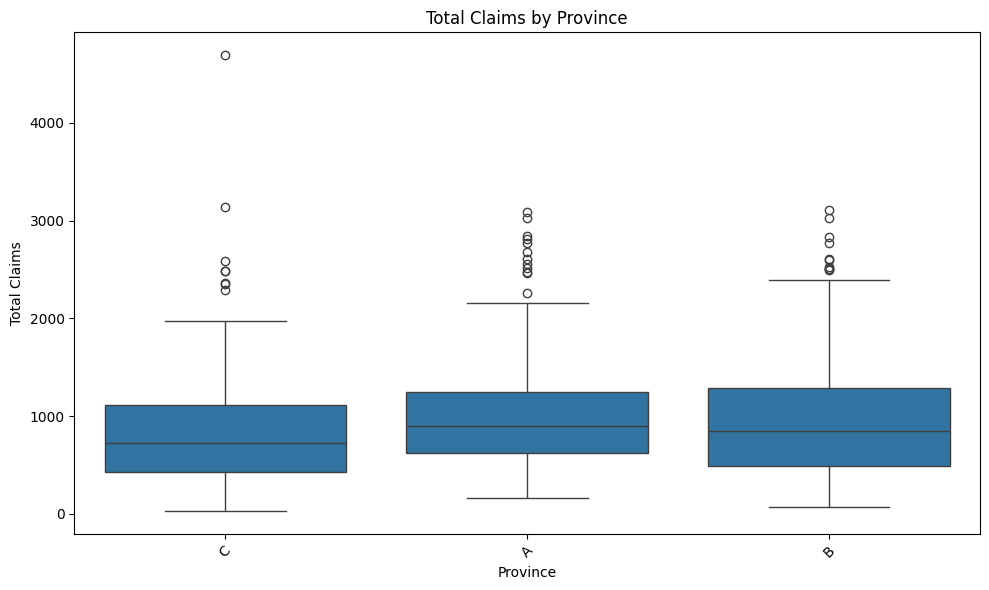

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Total Claims by Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='Total_Claim', data=data)
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


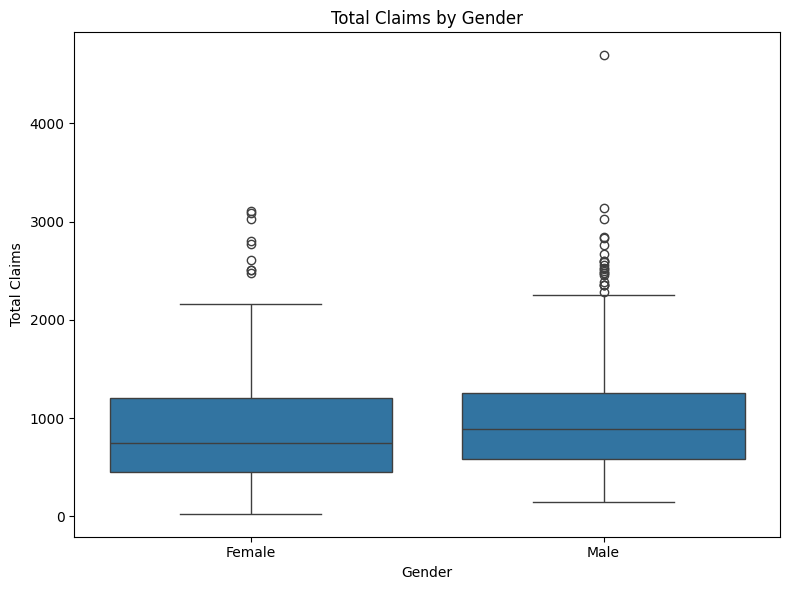

In [17]:
# Boxplot for Total Claims by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total_Claim', data=data)
plt.title('Total Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claims')
plt.tight_layout()
plt.show()


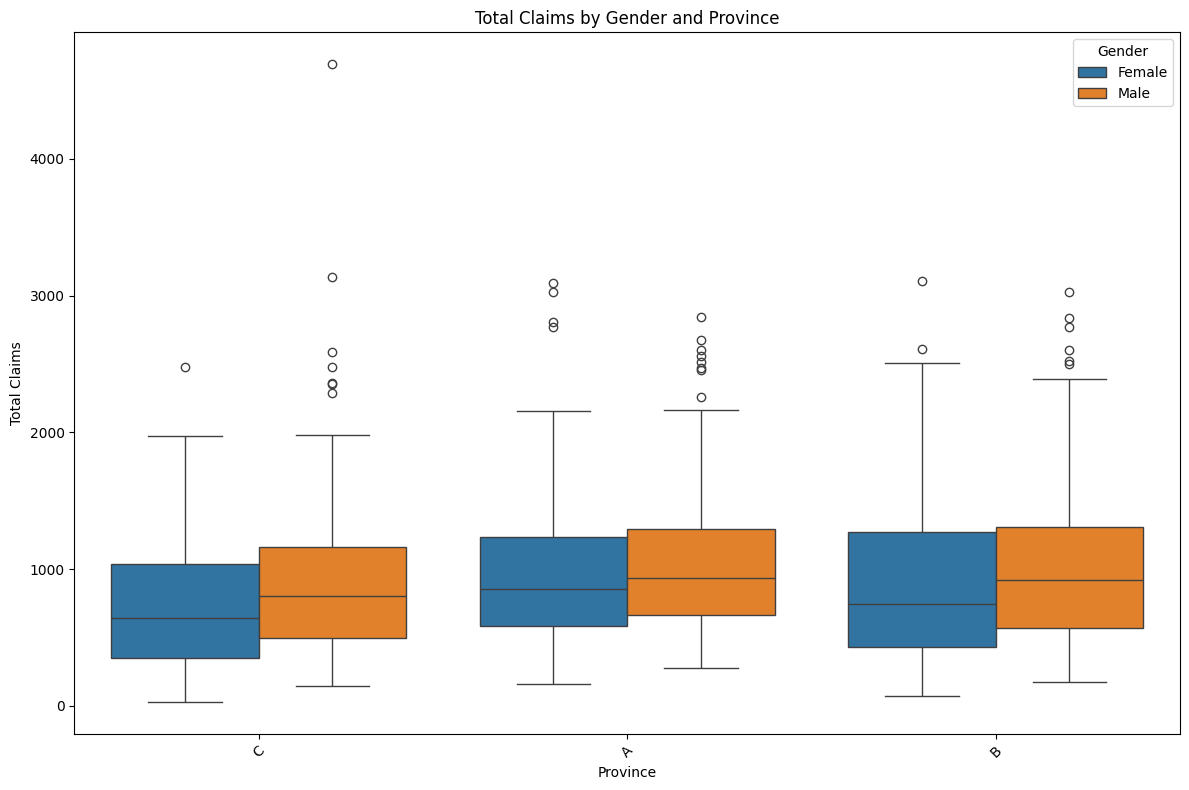

In [ ]:
# Boxplot for Total Claims by Gender and Province
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='Total_Claim', hue='Gender', data=data)
plt.title('Total Claims by Gender and Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
